In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px 
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


import folium

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [36]:
df = pd.read_excel(r"D:\Python DataScience\Covid19\COVID-19-Data-Analyisis\Covid cases in India.xlsx")

In [37]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [38]:
df.drop(['S. No.'],axis=1,inplace=True)

In [39]:
df["Total Cases"] = df["Total Confirmed cases (Indian National)"]+df["Total Confirmed cases ( Foreign National )"]

In [40]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [41]:
total_cases_overall = df["Total Cases"].sum()
print("Total Cases are : ",total_cases_overall)

Total Cases are :  729


In [42]:
df["Active_Cases"] = df["Total Cases"] - (df["Cured"] + df["Death"])

In [43]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active_Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [44]:
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active_Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [45]:
total_active_cases = df.groupby("Name of State / UT")["Active_Cases"].sum().sort_values(ascending=False).to_frame()

In [46]:
total_active_cases.style.background_gradient(cmap="Reds")

,Active_Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [47]:
## Graphs 

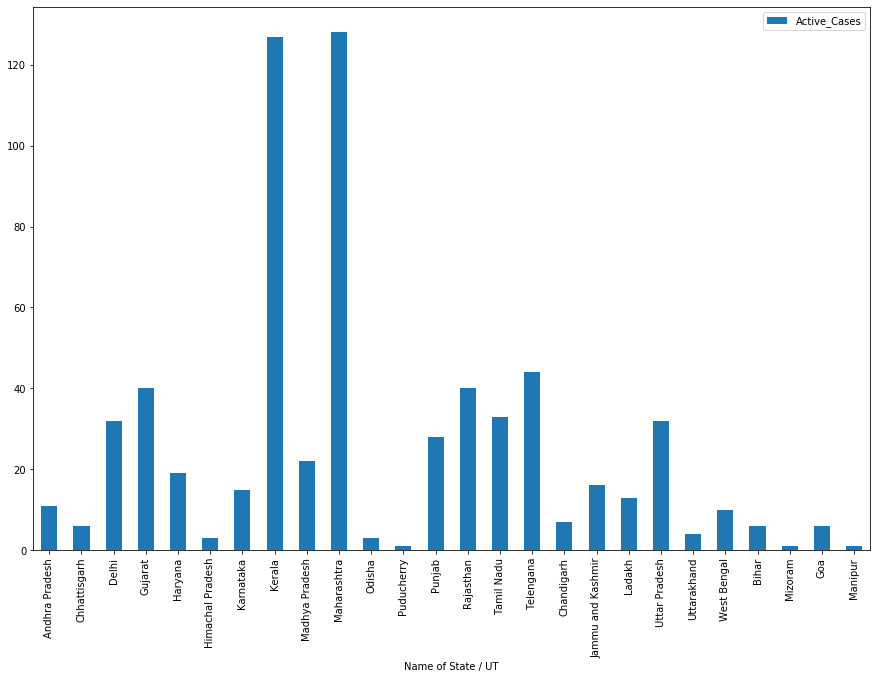

In [52]:
plt.rcParams['figure.figsize']=15,10
df.plot(kind = 'bar',x='Name of State / UT',y="Active_Cases")

In [69]:
#plotly
df.iplot(kind = 'bar',x='Name of State / UT',y="Active_Cases")

In [57]:
#plotly express
px.bar(df,x='Name of State / UT',y="Active_Cases")

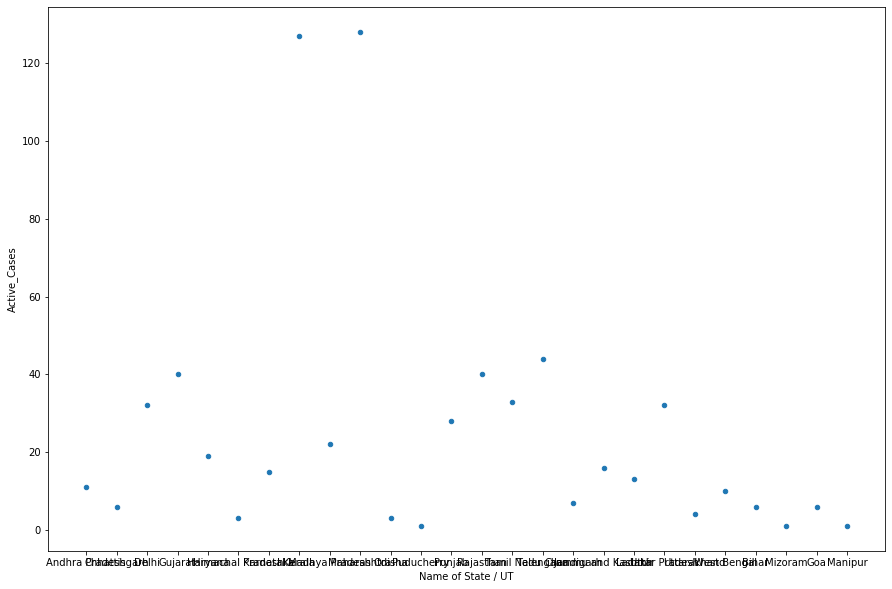

In [58]:
## Scatter Plot with pandas

df.plot(kind='scatter',x='Name of State / UT',y="Active_Cases")

In [61]:
df.iplot(kind='scatter',x='Name of State / UT',y="Active_Cases",mode="markers+lines",color="Red")

In [62]:
px.scatter(df,x='Name of State / UT',y="Active_Cases")

In [68]:
#plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df["Active_Cases"]))
fig.update_layout(title="Total Cases in India")

In [70]:
India_Cord = pd.read_excel(r"D:\Python DataScience\Covid19\COVID-19-Data-Analyisis\Indian Coordinates.xlsx")

In [71]:
India_Cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [76]:
df_full = pd.merge(India_Cord,df,on='Name of State / UT')

In [77]:
df_full.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active_Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [86]:
mp = folium.Map(location=[20,70],zoom_start=5, tiles="Stamenterrain")

In [87]:
mp

In [102]:
for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.2,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: '+str(value)+'<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(mp)

In [103]:
mp

## CoronaVirus Rise Analysis

In [105]:
daily_India = pd.read_excel(r"D:\Python DataScience\Covid19\COVID-19-Data-Analyisis\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
daily_Italy = pd.read_excel(r"D:\Python DataScience\Covid19\COVID-19-Data-Analyisis\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
daily_Korea = pd.read_excel(r"D:\Python DataScience\Covid19\COVID-19-Data-Analyisis\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
daily_Wuhan = pd.read_excel(r"D:\Python DataScience\Covid19\COVID-19-Data-Analyisis\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")


In [110]:
daily_India.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN


In [108]:
daily_Italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


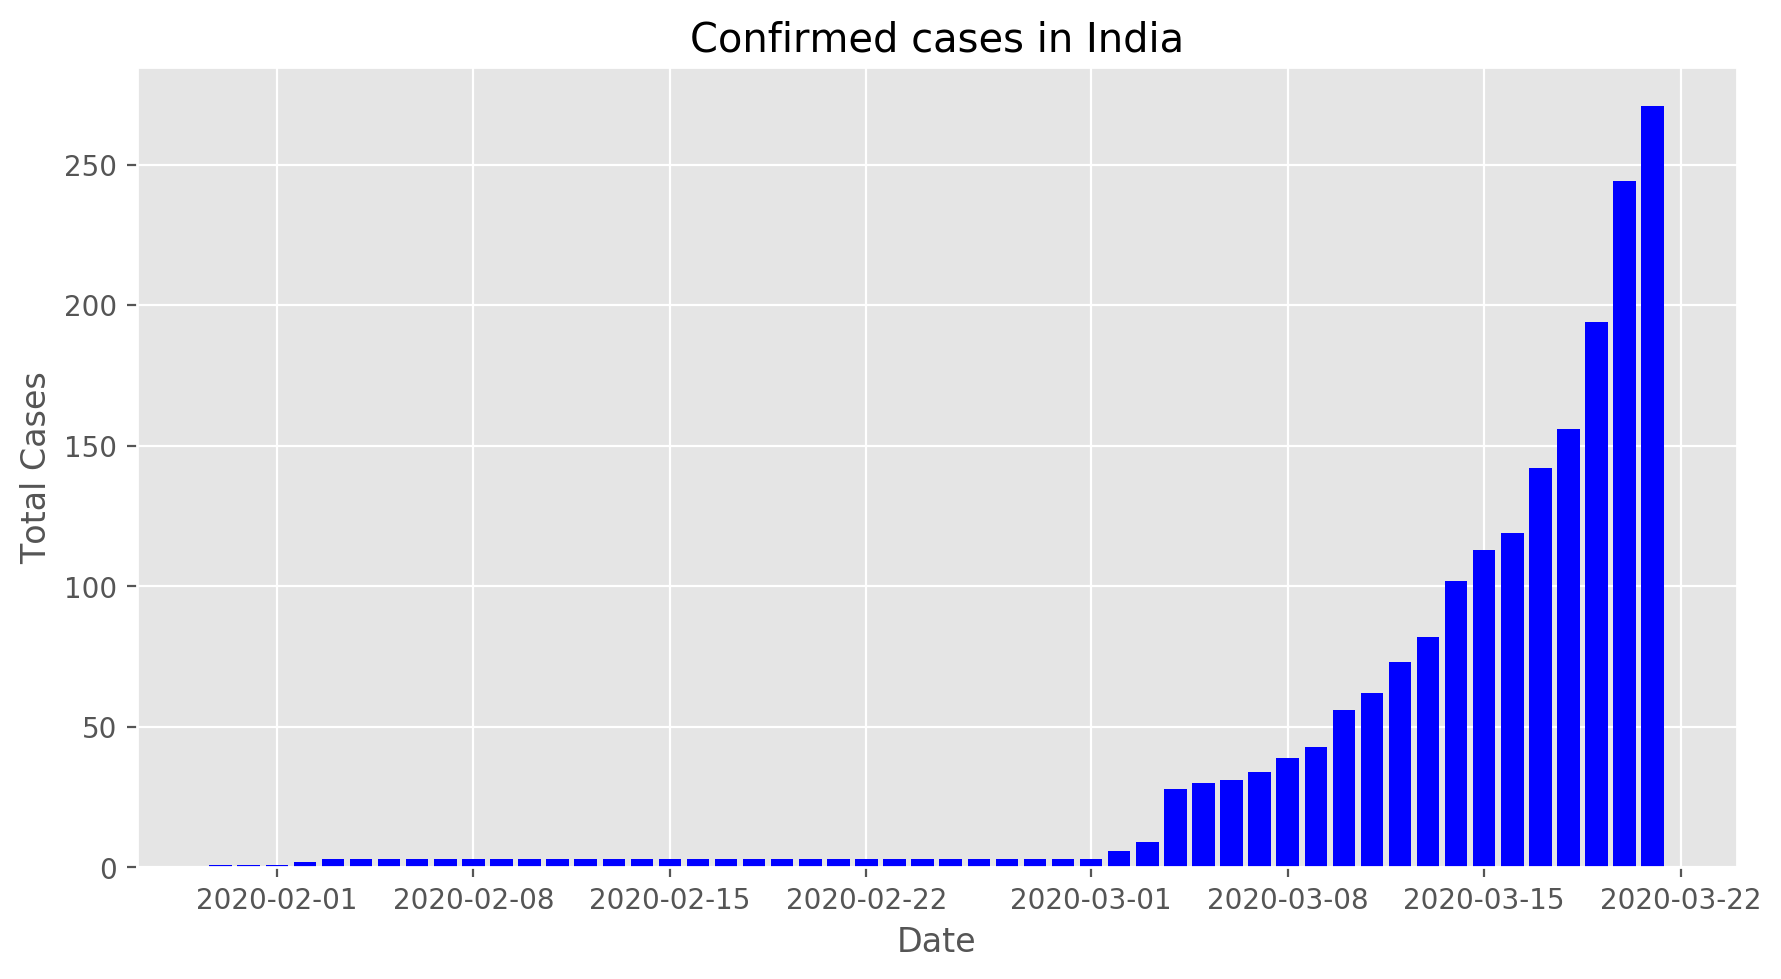

In [111]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(daily_India["Date"],daily_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


In [115]:
fig=px.bar(daily_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()